In [1]:
# this code is for building linear regression models to predict the  marker genes 
# to find out :
# how much the g1 g2 residuals are correlated in ad and how much they are correlated in control
# and what is the difference between them (DC of residuals)

In [2]:
import pandas as pd 
import scipy.stats as sp
df=pd.read_excel(open('newoutput_34.xlsx', 'rb'),sheet_name='Sheet1')
# reading from the 34 matrix
# this dataframe contains only the marker genes and their corresponding cell types 
# this dataframe contains the marker genes for the BM36 AND BM 44 regions 

In [3]:
ad_36=pd.read_csv("AD_36.csv")
ad_44=pd.read_csv("AD_44.csv")
ctl_36=pd.read_csv("CTL_36.csv")
ctl_44=pd.read_csv("CTL_44.csv")
# THE BELOW ARE THE CELL TYPE FREQUENCY DATA FOR THE ABOVE DATASETS 
ad_36_cts=pd.read_csv("AD_36_cts.csv")
ad_44_cts=pd.read_csv("AD_44_cts.csv")
ctl_36_cts=pd.read_csv("CTL_36_cts.csv")
ctl_44_cts=pd.read_csv("CTL_44_cts.csv")

In [4]:
ad_36_cts=ad_36_cts.iloc[:,1:len(ad_36_cts.columns)]
ad_44_cts=ad_44_cts.iloc[:,1:len(ad_44_cts.columns)]
ctl_36_cts=ctl_36_cts.iloc[:,1:len(ctl_36_cts.columns)]
ctl_44_cts=ctl_44_cts.iloc[:,1:len(ctl_44_cts.columns)]

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.stats as sp
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Xtrain is gonna be the corresponding to the ad/ctl cell type frequencies datasets 
# for every data point in the newoutput_34 dataset
# we have to pick the corresponding columns from the ad_36 and ad_44 datasets
# and build two LR models for both of them using ad_36_cts and ad_44_cts datasets
# we calculate the residual vectors for both these genes and find the correlation_ad
# we do the the same process above and find the correlation_ctl and then subract both to get the DC

In [6]:
gene_list=[set(ad_36.columns),set(ad_44.columns),set(ctl_36.columns),set(ctl_44.columns)]
gene_list=set.intersection(*gene_list)
# this is the entire set of genes which are present in the above mentioned datasets 

In [7]:
import math
# in the previous work we have found out the correlation between g1,g2 in ad and also in ctl and found out the 
# difference between the correlation to get the differential correlation


# but here we find out the correlation between the residual of g1, residual of g2 in ad and ctl and find the difference 
# difference between them is the DC_residual
list1=[]
list2=[]
temp=[]
cnt=0
X1=ad_36_cts
X2=ad_44_cts
X3=ctl_36_cts
X4=ctl_44_cts
for i, j in df.iterrows():# this dataframe contains the gene pairs which are M-M
    gene1=j['g1']
    gene2=j['g2']
    if gene1 in gene_list and gene2 in gene_list:
        y_train1=ad_36[gene1]
        y_train2=ad_44[gene2]
        y_train3=ctl_36[gene1]
        y_train4=ctl_44[gene2]

        X_train1=X1
        X_train2=X2
        X_train3=X3
        X_train4=X4
        # models corresponding to AD
        admodel1=LinearRegression().fit(X_train1,y_train1) 
        admodel2=LinearRegression().fit(X_train2,y_train2)
        # models corresponding to control
        ctlmodel1=LinearRegression().fit(X_train3,y_train3) 
        ctlmodel2=LinearRegression().fit(X_train4,y_train4)
        # these are the predictions for the ad samples
        ad_predictions_gene1=admodel1.predict(X_train1)
        ad_predictions_gene2=admodel2.predict(X_train2)
        # these are the predictions for the control samples 
        ctl_predictions_gene1=ctlmodel1.predict(X_train3)
        ctl_predictions_gene2=ctlmodel2.predict(X_train4)
        # the below residuals are for ad samples 
        ad_residual_gene1=y_train1-ad_predictions_gene1
        ad_residual_gene2=y_train2-ad_predictions_gene2
        # the below residuals are for control samples 
        ctl_residual_gene1=y_train3-ctl_predictions_gene1
        ctl_residual_gene2=y_train4-ctl_predictions_gene2
        
        list1.append(sp.spearmanr(ad_residual_gene1,ad_residual_gene2)[0])
        # the above list contains the correlation between the residuals of two genes in ad group
        list2.append(sp.spearmanr(ctl_residual_gene1,ctl_residual_gene2)[0])
        # the above list contains the correlation between the residuals of two genes in control group
    else:
        list1.append(-math.inf)
        list2.append(-math.inf)

In [8]:
prediction_M_M_AD=pd.DataFrame()
prediction_M_M_CTL=pd.DataFrame()

In [9]:
prediction_M_M_AD['original_value_AD_36']=y_train1
prediction_M_M_AD['predicted_value_AD_36']=ad_predictions_gene1
prediction_M_M_AD['original_value_AD_44']=y_train2
prediction_M_M_AD['predicted_value_AD_44']=ad_predictions_gene2

prediction_M_M_CTL['original_value_CTL_36']=y_train3
prediction_M_M_CTL['predicted_value_CTL_36']=ctl_predictions_gene1
prediction_M_M_CTL['original_value_CTL_44']=y_train4
prediction_M_M_CTL['predicted_value_CTL_44']=ctl_predictions_gene2

In [10]:
prediction_M_M_CTL.to_csv('prediction_M_M_CTL.csv')
prediction_M_M_AD.to_csv('prediction_M_M_AD.csv')

In [11]:
df2=pd.read_excel(open('plotsheet.xlsx', 'rb'),sheet_name='Sheet1')
len(df2)

774

In [12]:
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

In [13]:
list1=remove_values_from_list(list1,-math.inf)
list2=remove_values_from_list(list2,-math.inf)

In [14]:
len(list2)

774

In [15]:
import numpy as np
df2['DC_gene_res']=np.array(list1)-np.array(list2)
df2['corr_gene_ad_res']=list1
df2['corr_gene_ctl_res']=list2

In [16]:
df2.to_csv('residual_m_m.csv')

In [17]:
df2

,Unnamed: 0,Unnamed: 0.1,g1,g2,m1,m2,c1,c2,DC_gene,DC_cell,corr_gene_ad,corr_gene_ctl,corr_ctype_ad,corr_ctype_ctl,DC_gene_res,corr_gene_ad_res,corr_gene_ctl_res
0,1,107,DKC1,ADM,M,M,mic,end,0.622704,-0.326606,0.704485,0.081782,0.394057,0.720663,0.558918,0.389510,-0.169408
1,4,301,LINC01546,EHD1,M,M,opc,end,-0.641270,-0.489421,-0.602144,0.039127,-0.039949,0.449471,-0.389541,-0.381074,0.008466
2,5,397,ZBBX,CLPB,M,M,neu,mic,-0.651734,0.206826,-0.681173,-0.029439,0.042320,-0.164506,-0.023957,-0.317861,-0.293904
3,8,409,TMEM229A,LRRC32,M,M,ast,end,-0.633892,-0.293174,-0.649374,-0.015483,-0.105632,0.187542,-0.250789,-0.336985,-0.086196
4,9,410,THSD1,LRRC32,M,M,ast,end,-0.679995,-0.293174,-0.609973,0.070022,-0.105632,0.187542,-0.258904,-0.247776,0.011127
5,10,417,EFHC1,OR7E13P,M,M,ast,opc,-0.758245,-0.043116,-0.601929,0.156317,0.148855,0.191971,-0.630492,-0.497691,0.132801
6,12,424,MATN3,CHORDC1,M,M,end,opc,-0.659474,-0.276404,-0.716300,-0.056826,0.212358,0.488762,-0.031890,-0.345307,-0.313417
7,13,426,ERBB2,CHORDC1,M,M,ast,opc,-0.659965,-0.043116,-0.640691,0.019273,0.148855,0.191971,-0.073062,-0.309234,-0.236172
8,14,428,MSH4,CHORDC1,M,M,oli,opc,0.728986,-0.472730,0.821980,0.092994,0.147723,0.620453,0.321104,0.522846,0.201742
9,15,432,EDN1,CHORDC1,M,M,end,opc,-0.641900,-0.276404,-0.607698,0.034201,0.212358,0.488762,-0.519877,-0.535519,-0.015643


In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
def make_plot(x,y,disease_state,xl,yl):
    plt.plot(x, y, 'o', color='red')
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(disease_state)
    plt.show()

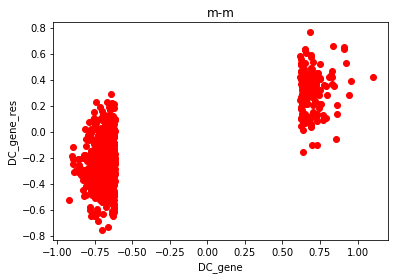

In [20]:
make_plot(df2['DC_gene'],df2['DC_gene_res'],"m-m",'DC_gene','DC_gene_res')

In [21]:
df2[['DC_gene','DC_gene_res']].to_csv('m_m_plot.csv',columns=['DC_gene','DC_gene_res'])

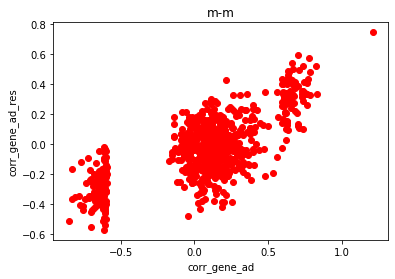

In [22]:
make_plot(df2['corr_gene_ad'],df2['corr_gene_ad_res'],"m-m",'corr_gene_ad','corr_gene_ad_res')

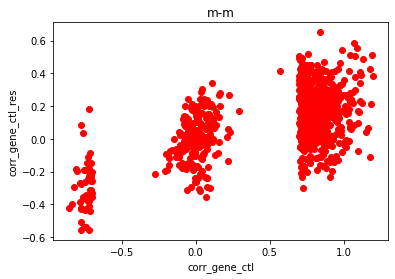

In [23]:
make_plot(df2['corr_gene_ctl'],df2['corr_gene_ctl_res'],"m-m",'corr_gene_ctl','corr_gene_ctl_res')

In [24]:
count=0

In [25]:
a=np.array(list1)-np.array(list2)
count=0
for i in a :
    if i< 0.5 and i>-0.5:
        count+=1

count        

723

Text(0.5, 1.0, 'M_M')

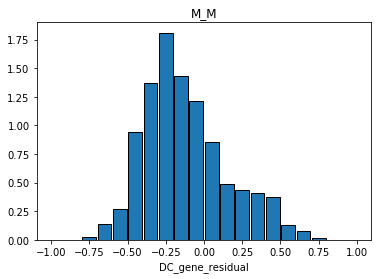

In [26]:
b=plt.hist(a,bins=[-1.0,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],edgecolor='black',rwidth=0.9,density=True,stacked=True)
plt.xlabel('DC_gene_residual')
plt.title('M_M')

Text(0.5, 1.0, 'M_M')

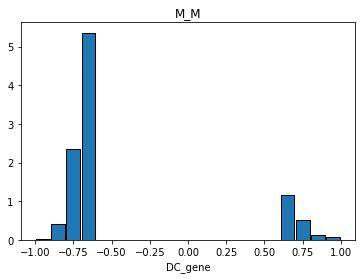

In [27]:
c=plt.hist(df2['DC_gene'],bins=[-1.0,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],edgecolor='black',rwidth=0.9,density=True,stacked=True)
plt.xlabel('DC_gene')
plt.title('M_M')

In [28]:
print(b[0])
#This is achieved by dividing the count
#by the number of observations times the bin width and not dividing by the total number of observations.

[0.         0.         0.02583979 0.14211886 0.27131783 0.94315245
 1.36950904 1.80878553 1.43410853 1.21447028 0.85271318 0.49095607
 0.43927649 0.41343669 0.374677   0.12919897 0.07751938 0.0129199
 0.         0.        ]


In [29]:
count/len(a)

0.9341085271317829